Hola **Fray**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b>

# Proyecto: Predicción de cancelación en Model Fitness

## Importación de librerías

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

## Carga de datos

In [21]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

## Análisis exploratorio de datos (EDA)

In [22]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, la carga de datos y exploración inicial se realizó correctamente para revisar los datos a trabajar
</div>

In [23]:
# Comparación entre clientes que se fueron y los que se quedaron
grouped = df.groupby('Churn').mean()
print(grouped)


         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

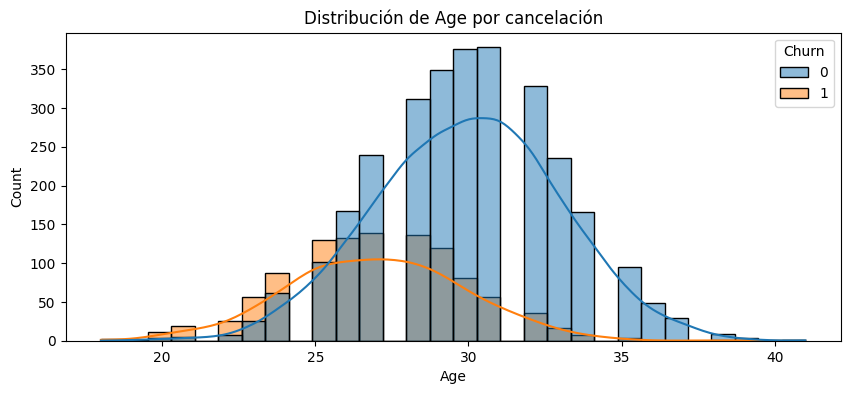

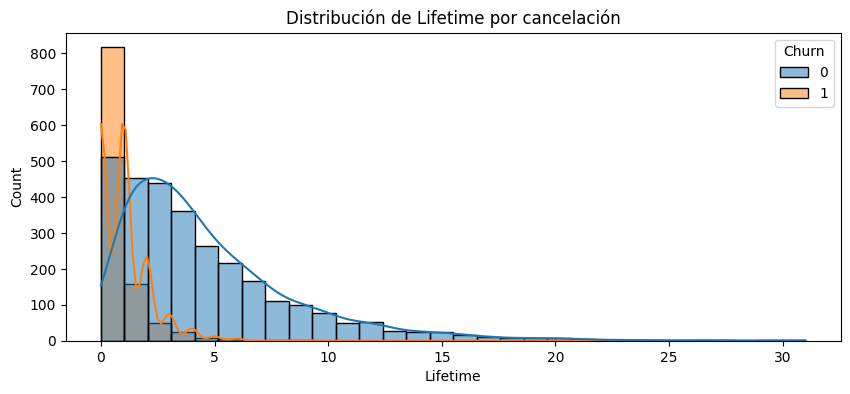

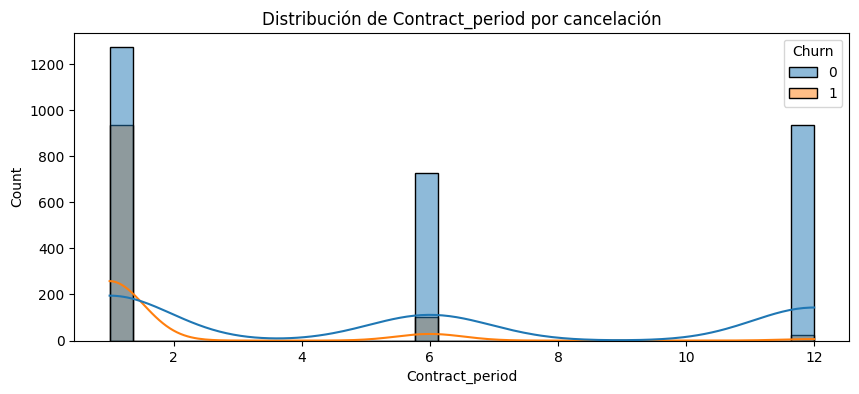

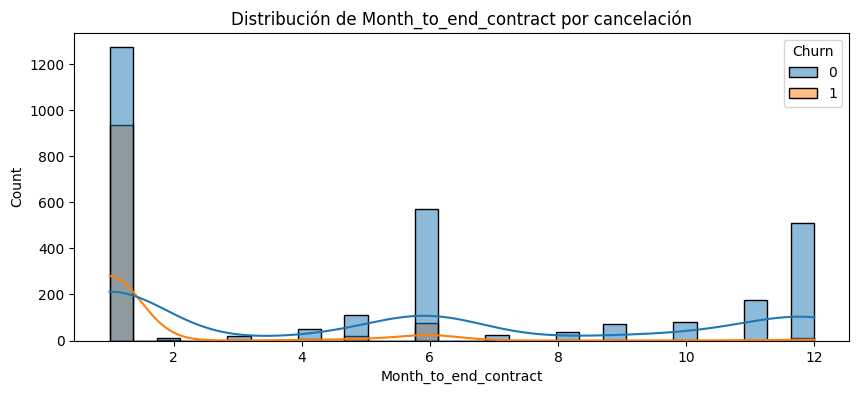

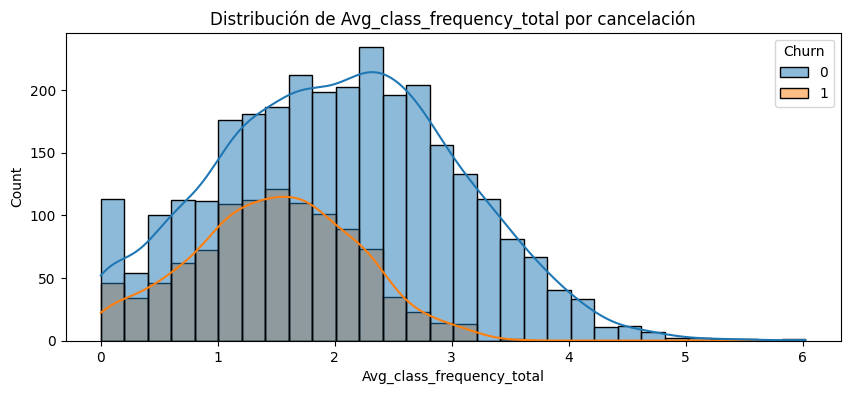

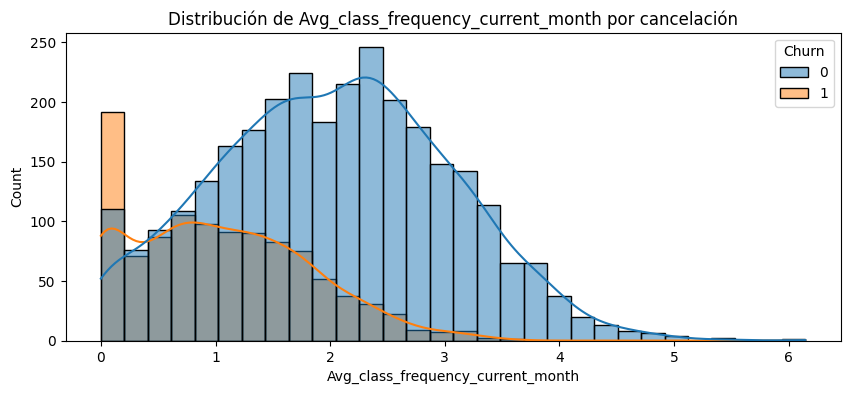

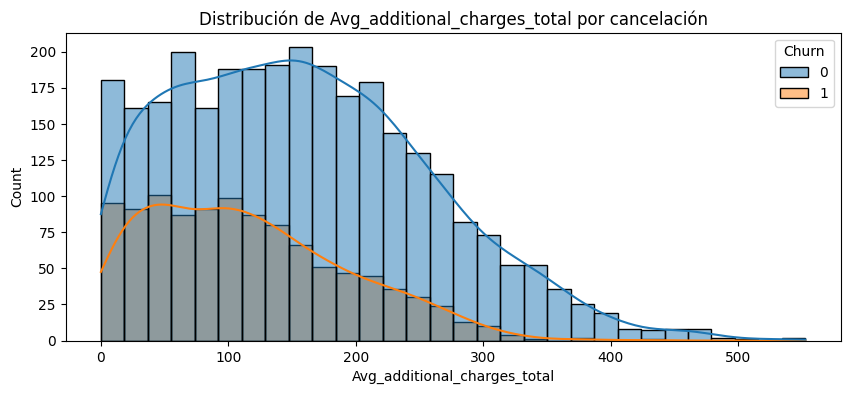

In [24]:
# Histogramas de distribución
features = ['Age', 'Lifetime', 'Contract_period', 'Month_to_end_contract', 'Avg_class_frequency_total', 
            'Avg_class_frequency_current_month', 'Avg_additional_charges_total']
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {feature} por cancelación')
    plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

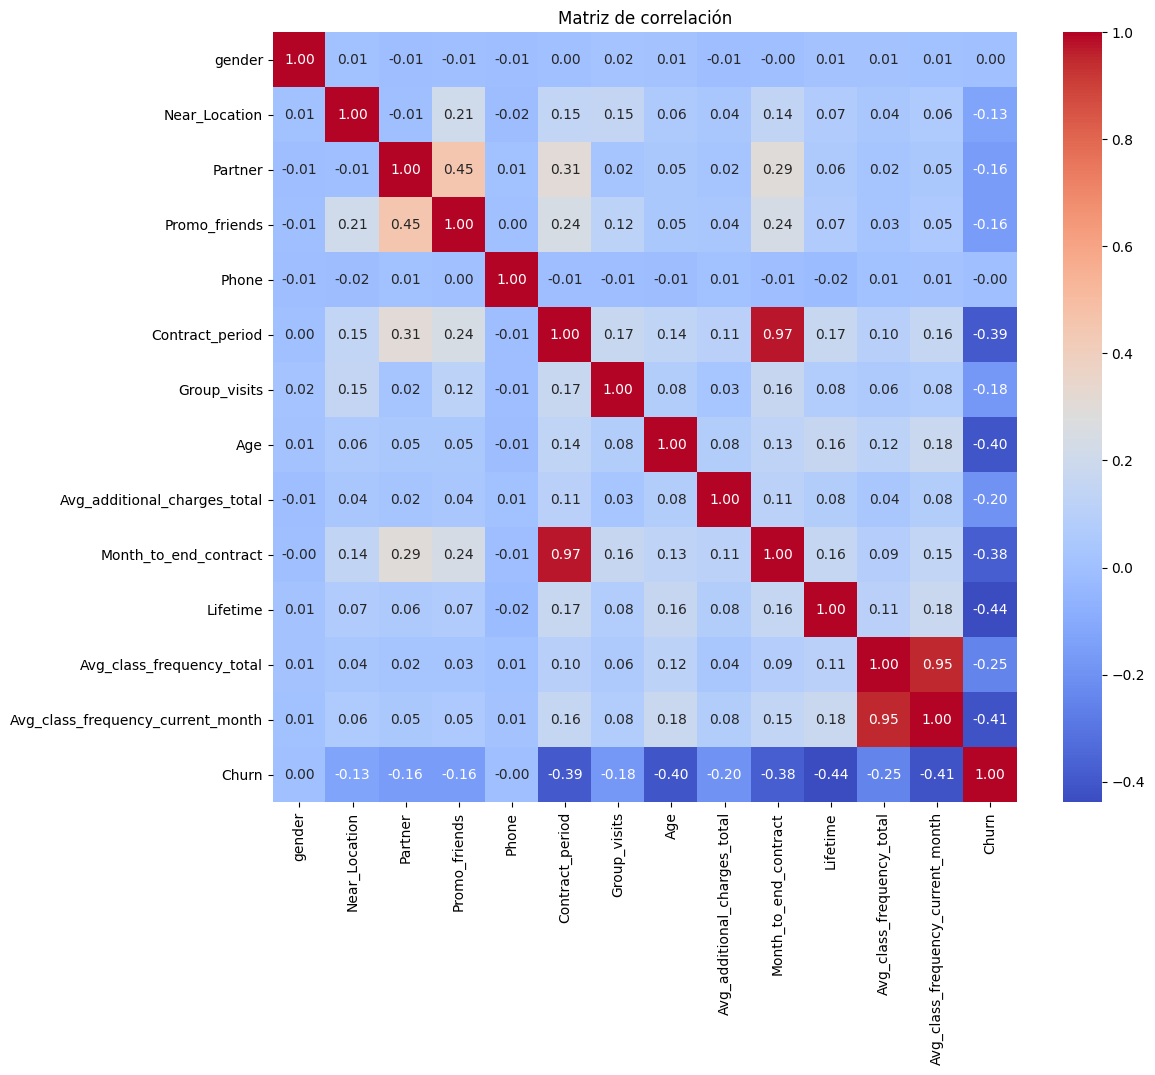

In [25]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

## Modelo predictivo

In [26]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)


In [27]:
# Modelo 1: Regresión Logística
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_valid)

In [28]:
# Modelo 2: Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_valid)

In [29]:
# Métricas de evaluación
def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print()

print_metrics(y_valid, y_pred_lr, "Regresión Logística")
print_metrics(y_valid, y_pred_rf, "Random Forest")


--- Regresión Logística ---
Accuracy: 0.926
Precision: 0.8841201716738197
Recall: 0.8142292490118577

--- Random Forest ---
Accuracy: 0.916
Precision: 0.8658008658008658
Recall: 0.7905138339920948



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
    
</div>

## Clustering

In [30]:
X_cluster = df.drop('Churn', axis=1)
X_cluster = pd.get_dummies(X_cluster, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

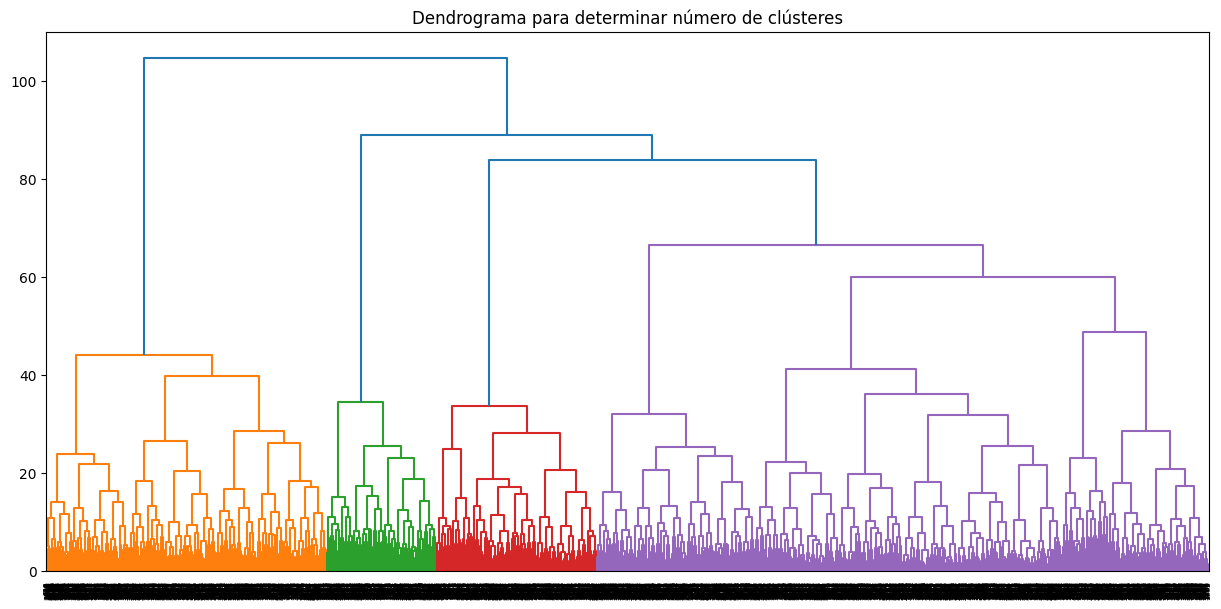

In [31]:
# Dendrograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title('Dendrograma para determinar número de clústeres')
plt.show()

In [32]:
# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [33]:
# Análisis por clúster
cluster_means = df.groupby('cluster').mean()
print("Valores medios por clúster:")
print(cluster_means)

Valores medios por clúster:
           gender  Near_Location   Partner  Promo_friends  Phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                          

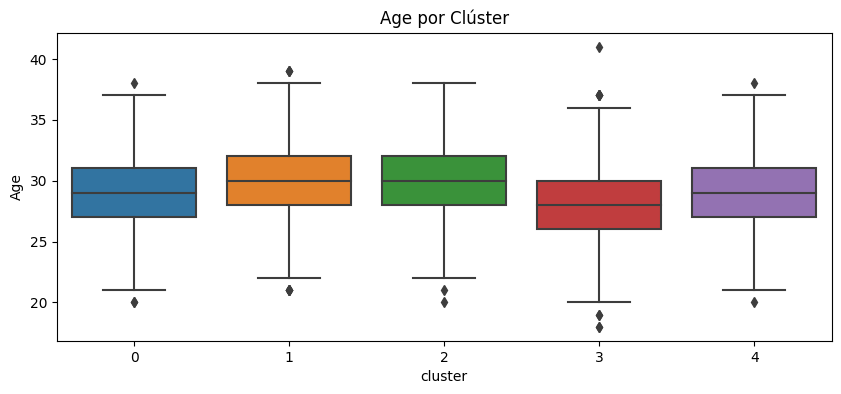

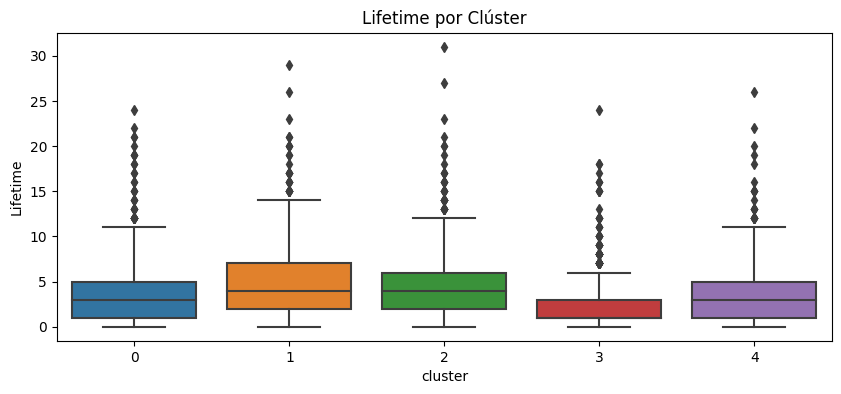

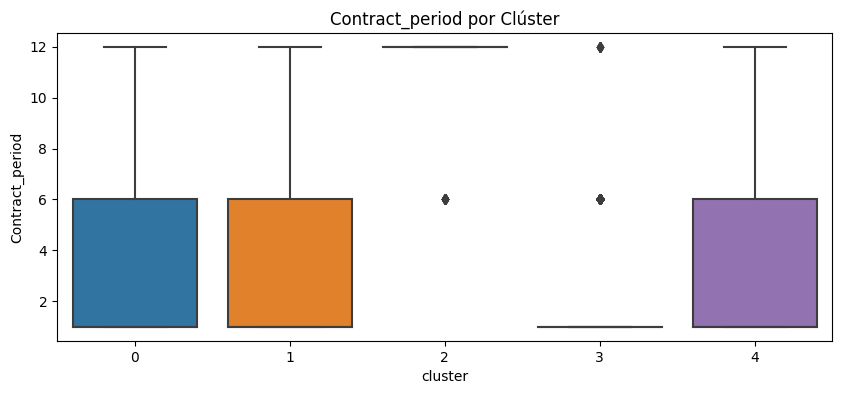

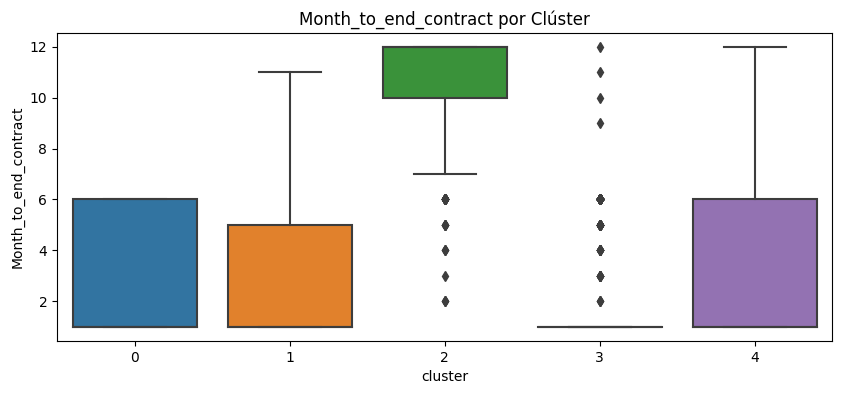

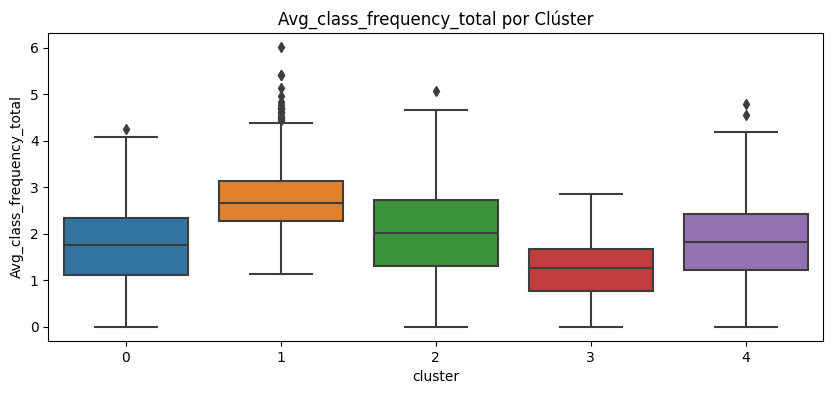

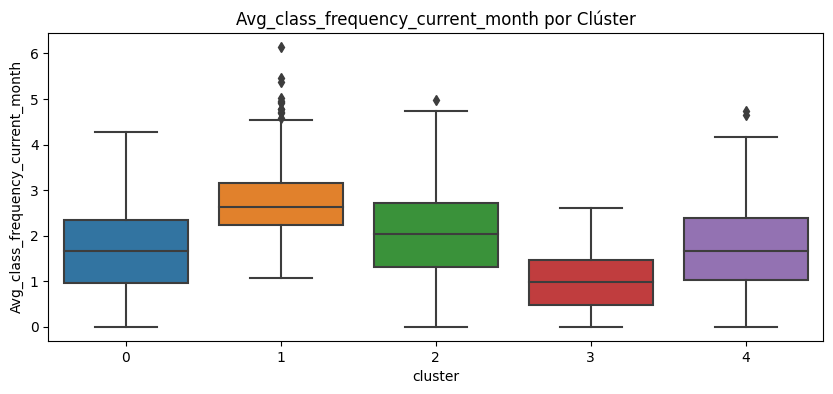

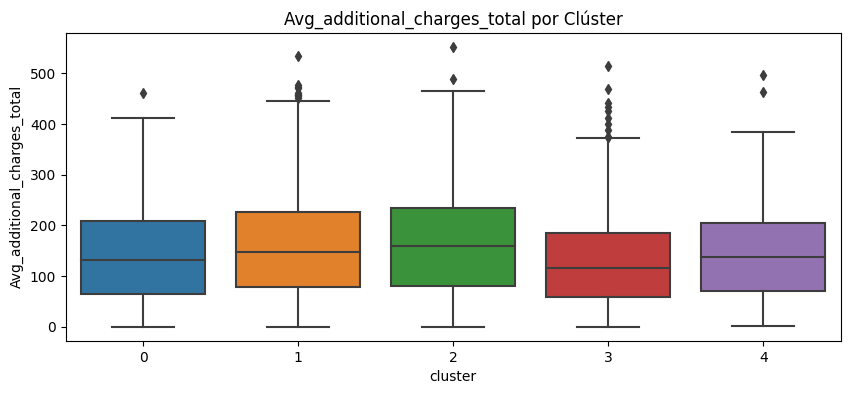

In [34]:
# Distribuciones por clúster
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x='cluster', y=feature)
    plt.title(f'{feature} por Clúster')
    plt.show()

Tasa de cancelación por clúster:
cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


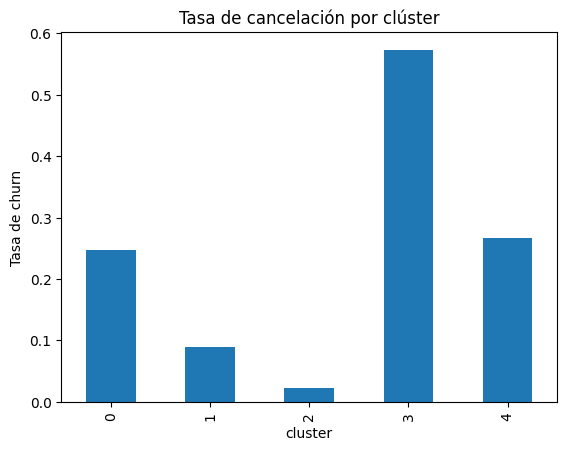

In [35]:
# Tasa de cancelación por clúster
churn_by_cluster = df.groupby('cluster')['Churn'].mean()
print("Tasa de cancelación por clúster:")
print(churn_by_cluster)

churn_by_cluster.plot(kind='bar', title='Tasa de cancelación por clúster', ylabel='Tasa de churn')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
    
</div>

## Conclusiones y recomendaciones



1. Fidelizar a los clientes con alta antigüedad y frecuencia:
   - Estos clientes muestran baja probabilidad de cancelación.
   - **Acción: Crea programas de fidelización con recompensas escalonadas según la antigüedad.**

2. Identificar y actuar sobre clientes con baja frecuencia de visitas recientes:
   - Suelen pertenecer a los clústeres con mayor tasa de cancelación.
   - **Acción: Envía recordatorios personalizados y promociones específicas (como clases gratis o asesorías) a quienes reduzcan sus visitas.¨**

3. Promover contratos más largos desde el inicio:
   - Clientes con contratos de 6-12 meses cancelan mucho menos.
   - **Acción: Ofrece descuentos progresivos por contratos trimestrales o anuales y resáltalos en el onboarding.**

4. Aprovechar los grupos:
   - Los usuarios que asisten a clases grupales tienen menor tasa de cancelación.
   - **Acción: Incentiva las inscripciones a clases grupales mediante referidos y promociones conjuntas.**

5. Personalizar las campañas por clúster:
   - Ejemplo:
     - Clúster 0: usuarios nuevos con contratos cortos y pocas visitas → **enviar promociones de extensión de contrato + bienvenida.**
     - Clúster 3: usuarios leales con alta frecuencia → **ofrecer membresías premium y roles como embajadores.***

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Te felicito por las conclusiones planteadas luego de ver los resultados de la segmentación utilizando los cluster, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>